# Forcasting(Airlines Passengers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [4]:
passengers= pd.read_excel(r"C:\Users\mrmri\Downloads\Assignments_Excelr\Forecasting\Airlines+Data.xlsx")

In [5]:
passengers

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(passengers))

In [7]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [8]:
passengers['Month'] = dates.month
passengers['Year'] = dates.year

In [9]:
passengers.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [10]:
passengers.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [11]:
passengers.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [12]:
import calendar
passengers['Month'] = passengers['Month'].apply(lambda x: calendar.month_abbr[x])
passengers.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
passengers = passengers[['Month','Year','Passengers']]

In [13]:
passengers.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [14]:
passengers['Date'] = dates
passengers.set_index('Date',inplace=True)

C:\Users\mrmri\AppData\Local\Temp/ipykernel_15148/3979590641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers['Date'] = dates


In [15]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


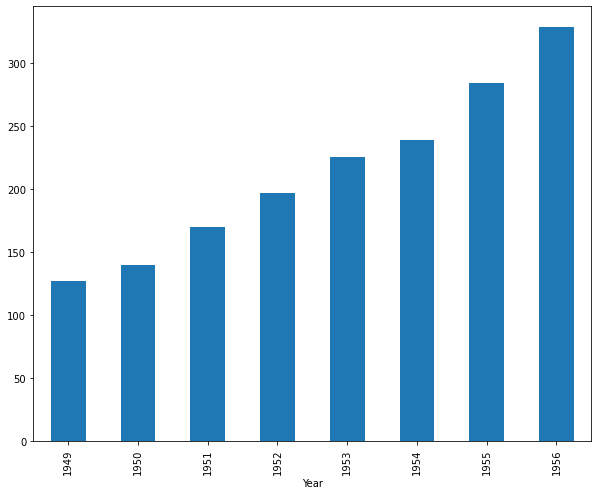

In [16]:
plt.figure(figsize=(10,8))
passengers.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

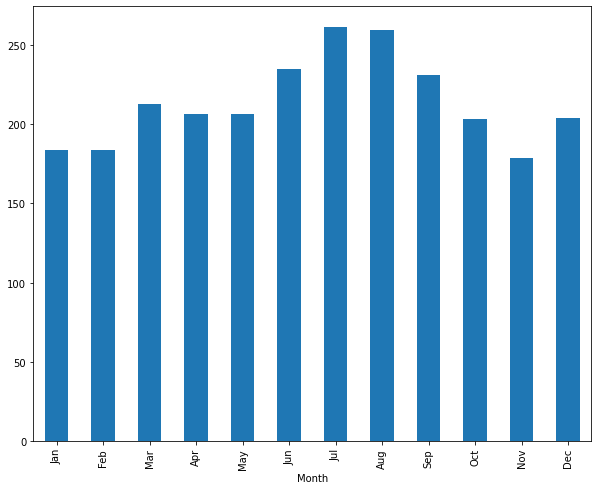

In [17]:
plt.figure(figsize=(10,8))
passengers.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [18]:
passengers_count = passengers['Passengers']

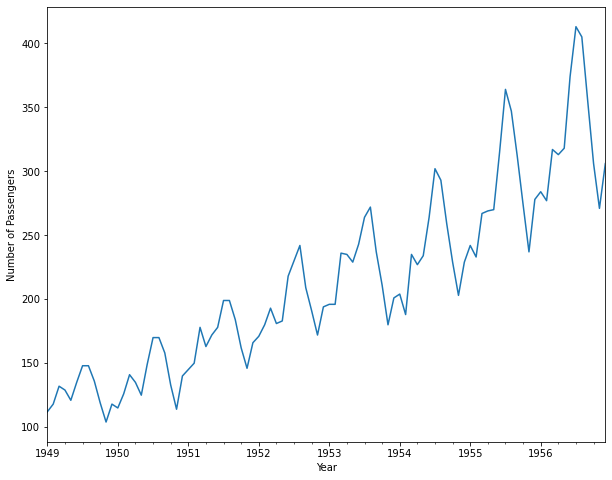

In [19]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [20]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

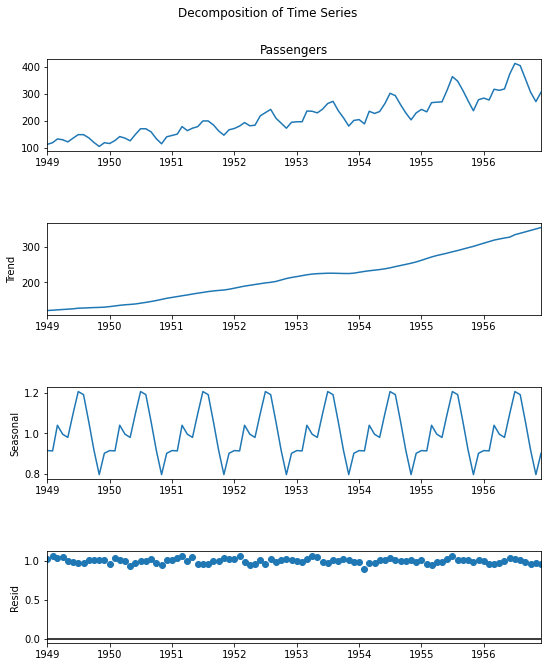

In [21]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

## Trend

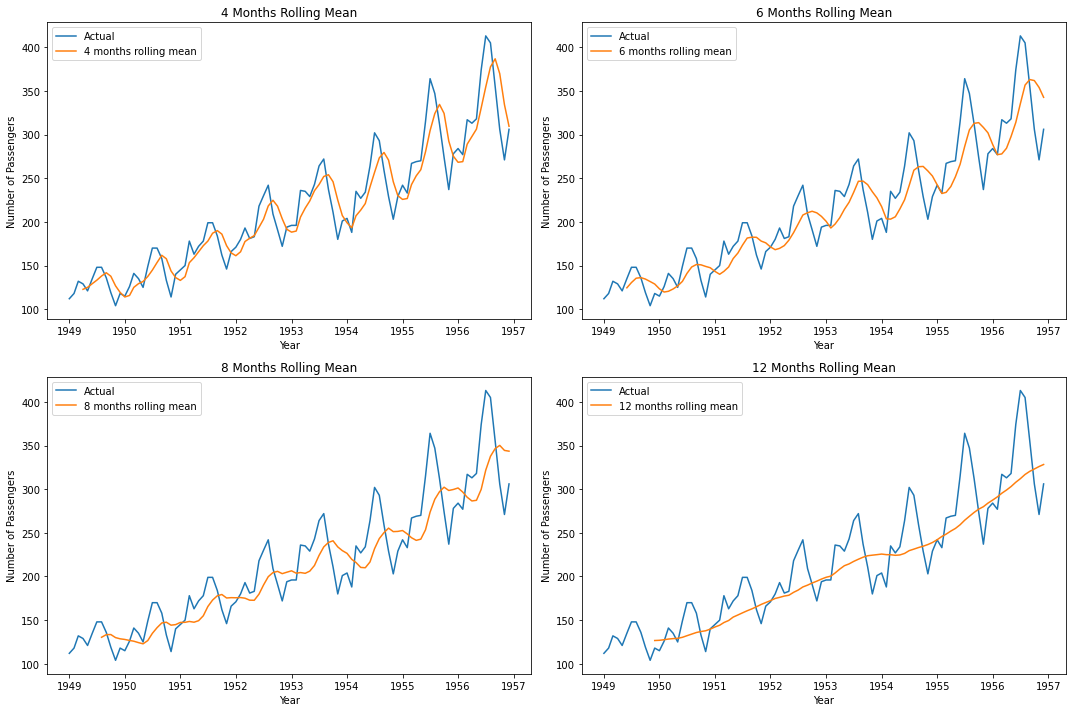

In [22]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

## Seasonality

In [23]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


In [24]:
monthly = pd.pivot_table(data=passengers,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


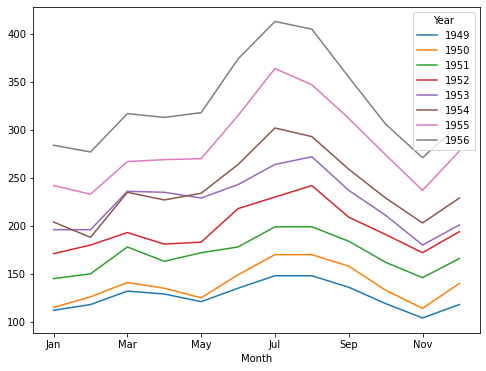

In [25]:
monthly.plot(figsize=(8,6))
plt.show()

In [27]:
yearly = pd.pivot_table(data=passengers,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306


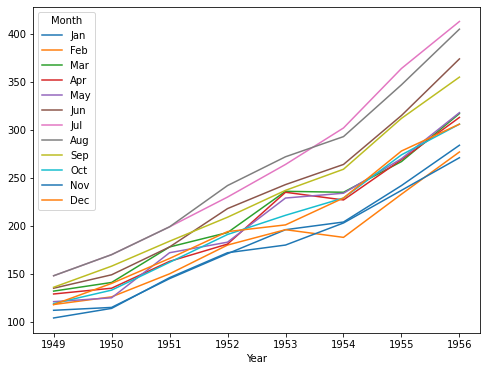

In [28]:
yearly.plot(figsize=(8,6))
plt.show()

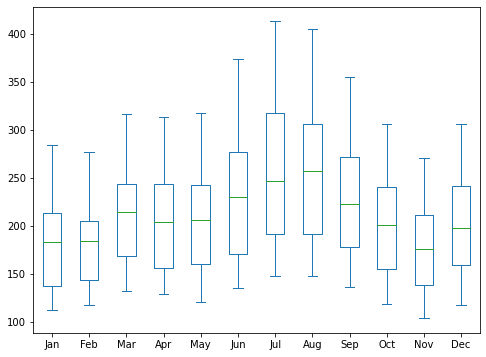

In [29]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [30]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(1.3402479596467065,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [31]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


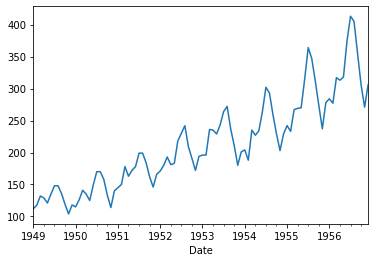

In [32]:
passengers_count.plot()
plt.show()

In [33]:
passengers_log = np.log10(passengers_count)

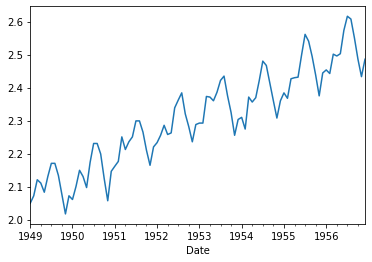

In [34]:
passengers_log.plot()
plt.show()

In [35]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


In [36]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [37]:
diff1.dropna(axis=0,inplace=True)

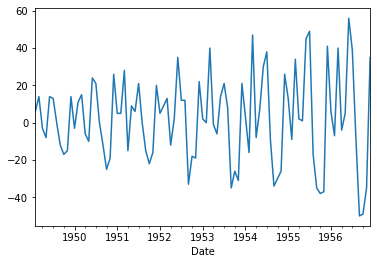

In [38]:
diff1.plot()
plt.show()

In [39]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [40]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

In [41]:
log_diff1.dropna(axis=0,inplace=True)


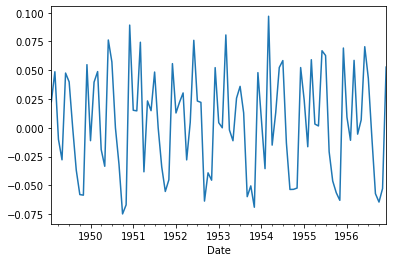

In [42]:
log_diff1.plot()
plt.show()

In [43]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [44]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

In [45]:
log_diff2.dropna(axis=0,inplace=True)


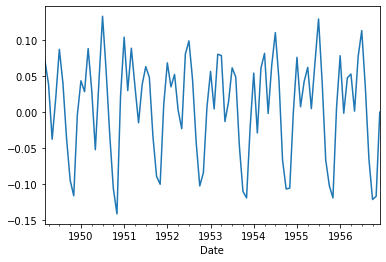

In [46]:
log_diff2.plot()
plt.show()

In [47]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [48]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [49]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [50]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [51]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [52]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.14131740781784


In [53]:
sarima = sm.tsa.staespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [54]:
sarima_results = sarima.fit()

In [55]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Sat, 30 Apr 2022   AIC                           -401.141
Time:                                    09:46:00   BIC                           -389.231
Sample:                                03-01-1949   HQIC                          -396.366
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3153      0.118     -2.673      0.008      -0.546      -0.084
ma.L1          1.0000    189.864   

In [56]:
passengers_count.tail(15)

Date
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: Passengers, dtype: int64

In [57]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [58]:
prediction.predicted_mean

1960-01-01    0.069716
Freq: MS, dtype: float64

In [59]:
predicted_values = np.power(10,prediction.predicted_mean)

In [60]:
predicted_values

1960-01-01    1.17413
Freq: MS, dtype: float64

In [61]:
actual = passengers_count['1960-01-01':]


In [62]:
actual

Series([], Name: Passengers, dtype: int64)

In [63]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

nan

In [64]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

nan

In [65]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [66]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1957-01-01,0.034234,0.102572
1957-02-01,-0.038539,0.043528
1957-03-01,0.012628,0.095936
1957-04-01,0.015625,0.099045
1957-05-01,-0.045424,0.038002


In [67]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1957-01-01,0.034234,0.102572
1957-02-01,-0.038539,0.043528
1957-03-01,0.012628,0.095936
1957-04-01,0.015625,0.099045
1957-05-01,-0.045424,0.038002


In [68]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [69]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1956-12-01,1.170584,1.082016,1.266402
1957-01-01,1.005760,0.915084,1.105422
1957-02-01,1.133136,1.029504,1.247200
1957-03-01,1.141130,1.036633,1.256161
1957-04-01,0.991491,0.900691,1.091446


In [70]:
fc_99.head()

,lower_ci_99,upper_ci_99
1956-12-01,1.082016,1.266402
1957-01-01,0.915084,1.105422
1957-02-01,1.029504,1.247200
1957-03-01,1.036633,1.256161
1957-04-01,0.900691,1.091446


In [71]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1956-12-01,1.170584,1.082016,1.266402,1.082016,1.266402
1957-01-01,1.005760,0.915084,1.105422,0.915084,1.105422
1957-02-01,1.133136,1.029504,1.247200,1.029504,1.247200
1957-03-01,1.141130,1.036633,1.256161,1.036633,1.256161
1957-04-01,0.991491,0.900691,1.091446,0.900691,1.091446


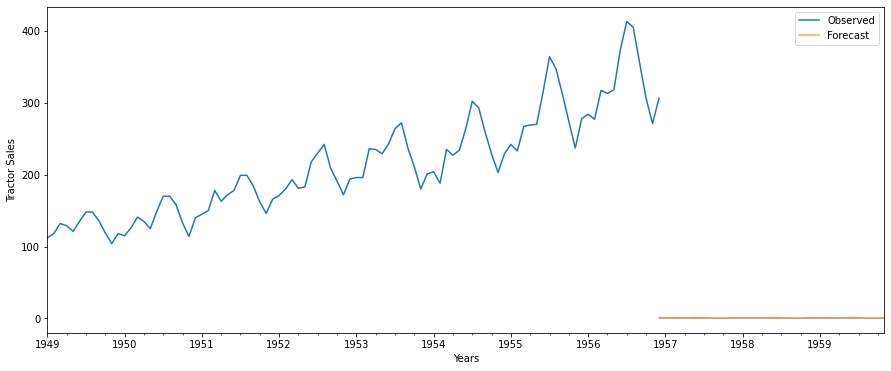

In [72]:
# plot the forecast along with the confidence band
axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

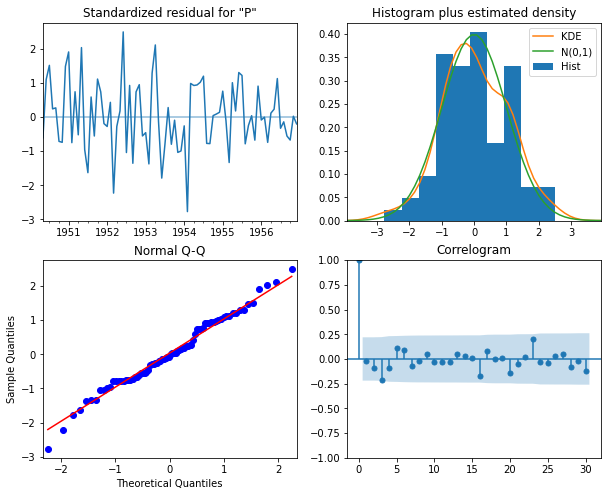

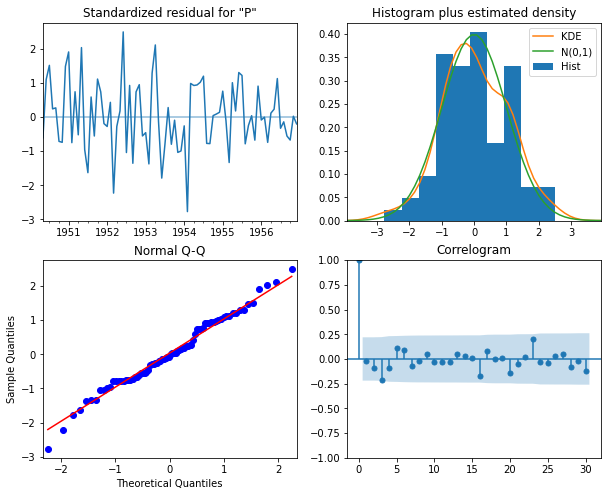

In [73]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

# Forcasting(Coca_Cola_Sales)

In [74]:
cocacola= pd.read_excel(r"C:\Users\mrmri\Downloads\Assignments_Excelr\Forecasting\CocaCola_Sales_Rawdata.xlsx")

In [75]:
df = cocacola.copy()

In [76]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [77]:
df= df.set_index('Quarter')

In [78]:
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [80]:
train = pd.read_excel(r"C:\Users\mrmri\Downloads\Assignments_Excelr\Forecasting\CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)

In [81]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [83]:
train

array([[1734.827],
       [2244.961],
       [2533.805],
       [2154.963],
       [1547.819],
       [2104.412],
       [2014.363],
       [1991.747],
       [1869.05 ],
       [2313.632],
       [2128.32 ],
       [2026.829],
       [1910.604],
       [2331.165],
       [2206.55 ],
       [2173.968],
       [2148.278],
       [2739.308],
       [2792.754],
       [2556.01 ],
       [2480.974]], dtype=float32)

In [87]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA

In [88]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 527.148


In [89]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [90]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [91]:
train = pd.read_excel(r"C:\Users\mrmri\Downloads\Assignments_Excelr\Forecasting\CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)
X = train.values
X = X.astype('float32')

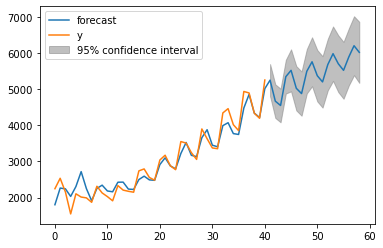

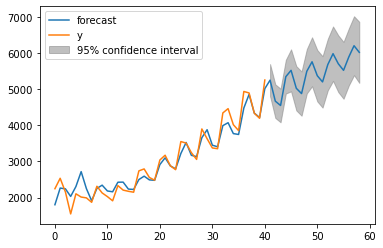

In [92]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 59)